# TorchVision

other options torchtext, torchaudio etc

- torchvision.datasets 
- torchvision.models 
- torchvision.transforms 
- torch.utils.data.Dataset
- torch.utils.data.DataLoader - creates python iterable over datasets

In [ ]:
import torch 
from torch import nn 

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # transform images 

# imoport matplotlib
import matplotlib.pyplot as plt 

print(torch.__version__)
print(torchvision.__version__)

2.3.0
0.18.0


## getting dataset

### fashionmnist

In [96]:
# built in datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),  # how do we want to transform the data
    target_transform=None,  # how do we want to transform the target
)

In [97]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),  # how do we want to transform the data
    target_transform=None,  # how do we want to transform the target
)

In [98]:
len(train_data), len(test_data)

(60000, 10000)


- ToTensor() converts PIL/np.darray are in (HxWxC) in range [0,255] to torch.FloatTensor of shape (CxHXW) in range [0.0,1.0]



In [99]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [100]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [101]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [102]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [103]:
# check shape 
image, label= train_data[0]
print(f"Image Shape: {image.shape} -> (color_channel, height, width)")
print(f"Label shape: {label} -> scalar")

Image Shape: torch.Size([1, 28, 28]) -> (color_channel, height, width)
Label shape: 9 -> scalar


Image shape: torch.Size([1, 28, 28])


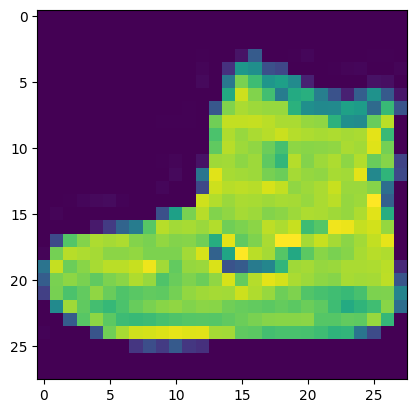

In [104]:
# visualise
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())  # show image Invalid shape (1, 28, 28) for image data hence have to squeeze

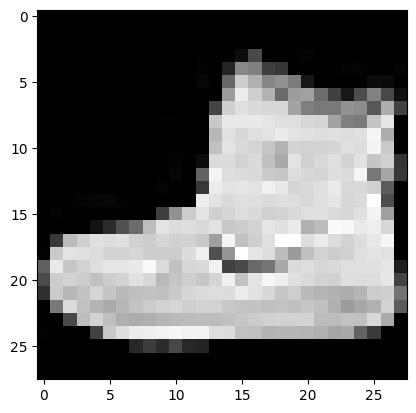

In [105]:
plt.imshow(image.squeeze(), cmap='grey')

In [106]:
class_names[0]

'T-shirt/top'

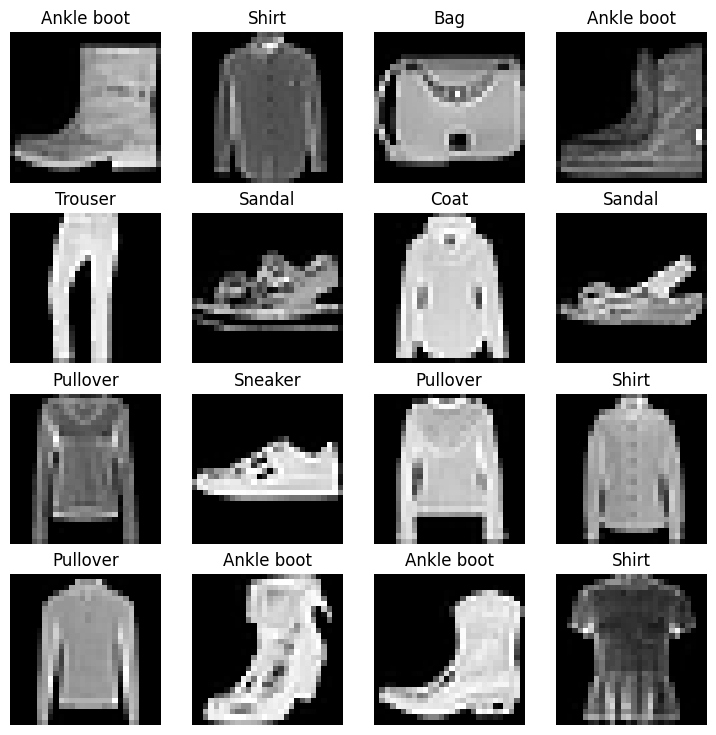

In [107]:
# plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9)) # fig size is size of figure in inches
rows, cols = 4, 4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(
        0, len(train_data), size=[1]
    ).item()  # tensor.item() extracts the single value from a tensor and turns it into a normal Python number.
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False)


# prepare dataloader

In [108]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

- rightnow our data is in form of pytorch datasets 
- DataLoader converts our data into python iterable 
- we turn our data into batches (mini-batches)
- we do this to be computational more efficient
- give model more chance to update its gradient each epoch (for each mini-batch) 
- minibatch gradient descent


In [109]:
from torch.utils.data import DataLoader

batch_size = 32 

train_data_loader = DataLoader(
    train_data, 
    batch_size=batch_size, 
    shuffle=True )

test_data_loader = DataLoader(
    test_data, 
    batch_size=batch_size, 
    shuffle=False)

In [110]:
train_data_loader

In [111]:
len(train_data_loader), len(test_data_loader) # number of mini-batchs

(1875, 313)

In [112]:
train_features_batch, train_labels = next(iter(train_data_loader))
train_features_batch.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Model0 : baseline

In [ ]:
flatten_model = nn.Flatten() 
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [51]:
# see what flatten do
output = flatten_model(x)
print(f"Old shape: {x.shape}")
print(f"New shape: {output.shape}")

Old shape: torch.Size([1, 28, 28])
New shape: torch.Size([1, 784])


In [52]:
from torch import nn 

class FashionMNISTModel0(nn.Module):
    def __init__(self, input_shape: int,hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [53]:
model0 = FashionMNISTModel0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
)

In [54]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0282, -0.0165, -0.0101,  ..., -0.0272,  0.0052,  0.0173],
                      [ 0.0309, -0.0218, -0.0176,  ...,  0.0272, -0.0169,  0.0213],
                      [ 0.0087, -0.0238,  0.0124,  ..., -0.0115, -0.0096,  0.0006],
                      ...,
                      [-0.0131,  0.0312,  0.0269,  ..., -0.0275,  0.0082,  0.0330],
                      [ 0.0051,  0.0048, -0.0134,  ..., -0.0047, -0.0345,  0.0140],
                      [ 0.0278,  0.0035, -0.0279,  ...,  0.0152, -0.0084,  0.0227]])),
             ('layer_stack.1.bias',
              tensor([-0.0054, -0.0284, -0.0354, -0.0013,  0.0105, -0.0211,  0.0281,  0.0169,
                       0.0215,  0.0165])),
             ('layer_stack.2.weight',
              tensor([[-0.3050, -0.0580,  0.1643,  0.1565, -0.2877, -0.1792,  0.2305, -0.2618,
                        0.2397, -0.0610],
                      [ 0.0232,  0.1542,  0.0851, -0.2027,  0.1030, -0.2715, -0.

In [55]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("File already exists!")
else:
    print("Downloading...")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
    )
    with open("helper_functions", "wb") as f:
        f.write(request.content)


File already exists!


In [59]:
from helper_functions import accuracy_fn
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

In [ ]:
# setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)

In [61]:
# creating functions to time our experiments
from timeit import default_timer as timer 

def print_train_time(start:float, end:float, device: torch.device=None):
    """Print difference between start and end time"""
    total_time = end - start 
    print(f"Train time on {device}: {total_time} seconds")
    return total_time

# training model on mini-batches

1. loop through epochs 
2. loop through training batches, perform training steps, calculate loss per batch 
3. loop through testing batches, perform training steps, calculate loss per batch 
4. print stuff
5. time

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
start_time = timer()

epochs = 3 

### Training
for epoch in range(epochs):
    # Train
    train_loss = 0

    # Add a loop to loop through training batches
    for batch, (X,y) in enumerate(train_data_loader):
        # set to training mode
        model0.train()

        # 1. forward pass
        y_pred = model0(X)
        # 2. calculate loss
        loss = loss_fn(y_pred,y)
        # sum all loss for all batches
        train_loss += loss

        # 3,4,5 steps
        optimizer.zero_grad()
        loss.backward()
        # updating model for every batch
        optimizer.step()

    # divide total loss by length of our train_data_loader
    train_loss /= len(train_data_loader)

    ### Testing
    test_loss, test_acc = 0, 0
    model0.eval()
    with torch.inference_mode():
        # no enumerate for no batch index, as data_loader is alr iterable no need for enumerator
        for X_test,y_test in test_data_loader:
            test_pred = model0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1)) # send max logit 

        test_loss /= len(test_data_loader)
        test_acc /= len(test_data_loader)

    end_time = timer()
    print_train_time(start_time,end_time,str(next(model0.parameters()).device))

    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:4f} Acc:{test_acc:4f}")

Epoch: 0
Train time on cpu: 3.1726345830002174 seconds
Epoch: 0 | Train Loss: 0.2488 | Test Loss: 0.493199 Acc:82.737620
Epoch: 1
Train time on cpu: 6.525564541000676 seconds
Epoch: 1 | Train Loss: 0.5094 | Test Loss: 0.480398 Acc:83.057109
Epoch: 2
Train time on cpu: 9.440234958000474 seconds
Epoch: 2 | Train Loss: 0.2548 | Test Loss: 0.472635 Acc:83.596246


: → start format specifier

.4 → 4 decimal places

f → floating-point format

### eval

In [73]:
def eval_model(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn):
    loss, acc = 0, 0
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred = model(X)

            # accumulate loss and accuracy
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y,y_pred.argmax(dim=1))

        # scale loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name:": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_accuracy": acc
            }


In [196]:
model0_results = eval_model(model0, test_data_loader, loss_fn, accuracy_fn)

TypeError: eval_model() missing 1 required positional argument: 'device'

In [195]:
model0_results

{'model_name:': 'FashionMNISTModel1',
 'model_loss': 0.6473129987716675,
 'model_accuracy': 76.4876198083067}

# model 1: non-linear

In [81]:
import torch 
# device
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)
print(device)

mps


In [82]:
class FashionMNISTModel1(nn.Module):
    def __init__(self, input_shape: int,hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flattens to single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self,x):
        return self.layer_stack(x)

In [83]:
torch.manual_seed(42)
model1 = FashionMNISTModel1(28*28, 10, len(class_names)).to(device)

In [86]:
model1

FashionMNISTModel1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [85]:
next(model1.parameters()).device

device(type='mps', index=0)

In [87]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

# Functionazing traing and eval codes

In [91]:
def train_step(
    model: torch.nn.Module, 
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimzer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device= device):
    """Perform a training step of model"""
    train_loss, train_acc = 0, 0

    # set to training mode
    model.train()

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(dataloader):

        # put X and y on device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)
        # 2. calculate loss
        loss = loss_fn(y_pred,y)
        acc = accuracy_fn(y,y_pred.argmax(dim=1))

        # sum all loss and accuracy for all batches
        train_loss += loss
        train_acc += acc

        # 3,4,5 steps
        optimizer.zero_grad()
        loss.backward()
        # updating model for every batch
        optimizer.step()

    # divide total loss and accuracy by length of our train_data_loader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_acc} | Train Acc: {train_acc}")

In [115]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimzer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device,
):
    """Perform a testing step of model"""
    test_loss, test_acc = 0, 0

    # set to testing mode
    model.eval()

    # turn on inference mode context manager
    with torch.inference_mode():
        # loop to loop through training batches
        for batch, (X, y) in enumerate(dataloader):
            # put X and y on device
            X, y = X.to(device), y.to(device)

            # 1. forward pass
            y_pred = model(X)
            # 2. calculate loss
            loss = loss_fn(y_pred,y)
            acc = accuracy_fn(y, y_pred.argmax(dim=1))

            # sum all loss and accuracy for all batches
            test_loss += loss
            test_acc += acc

        # divide total loss and accuracy by length of our train_data_loader
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    print(f"Test Loss: {test_loss} | Test Acc: {test_acc}")

Inside torch.inference_mode():
- tensors are immutable
- in-place ops (+=, /=, etc.) are forbidden

In [116]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer 
start = timer()

epoch = 3 

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} -------")
    train_step(model1, train_data_loader,loss_fn, optimizer, accuracy_fn, device)
    test_step(model1, test_data_loader, loss_fn, optimizer, accuracy_fn, device)

end = timer()
total_time = print_train_time(start, end, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 -------
Train Loss: 77.47333333333333 | Train Acc: 77.47333333333333
Test Loss: 0.6476508975028992 | Test Acc: 76.19808306709265
Epoch: 1 -------
Train Loss: 77.55333333333333 | Train Acc: 77.55333333333333
Test Loss: 0.6657809615135193 | Test Acc: 75.61900958466454
Epoch: 2 -------
Train Loss: 77.725 | Train Acc: 77.725
Test Loss: 0.6473129987716675 | Test Acc: 76.4876198083067
Train time on mps: 26.661821249999775 seconds


In [122]:
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device
):
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            X,y = X.to(device), y.to(device)
            
            y_pred = model(X)

            # accumulate loss and accuracy
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # scale loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name:": model.__class__.__name__,  # only works when model was created with a class
        "model_loss": loss.item(),
        "model_accuracy": acc,
    }

In [123]:
model1_results = eval_model(model1, test_data_loader, loss_fn, accuracy_fn,device)

In [194]:
model1_results

{'model_name:': 'FashionMNISTModel1',
 'model_loss': 0.6473129987716675,
 'model_accuracy': 76.4876198083067}

# CNN

In [185]:
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicates TinyVGG"""
    def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
        super().__init__()
        # input (1,28,28)
        self.conv_bloc_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            # 1.1: (10,28,28)
            nn.ReLU(),
            # 1.2: (10,28,28)
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            # 1.3: (10,28,28)
            nn.ReLU(),
            # 1.4: (10,28,28)
            nn.MaxPool2d(kernel_size=2),
            # 1.5: (10,14,14)
        )
        # input (10,14,14)
        self.conv_bloc_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            # 2.1: (10,14,14)
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            # 2.4: (10,14,14)
            nn.MaxPool2d(kernel_size=2),
            # 2.5: (10,7,7)
        )
        # input (10,7,7)
        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
        )

    def forward(self,x):
        # return self.classifier(self.conv_bloc_2(self.conv_bloc_1(x)))
        x = self.conv_bloc_1(x)
        # print(f"Shape after block1: {x.shape}")
        x = self.conv_bloc_2(x)
        # print(f"Shape after block2: {x.shape}")
        return self.classifier(x)

In [186]:
image.shape

torch.Size([1, 28, 28])

What nn.Conv2d actually does
- [B, C_in, H, W] input 
- [B, C_out, H_out, W_out] output

1. Kernel shape
- Each convolution filter has shape:
- [C_in, K, K]
- So each kernel is: [hidden_units, 3, 3]

2. Sliding operation
- For each spatial position:
  - Take a 3×3 patch from every channel
  - Elementwise multiply with kernel weights
  - Sum everything → one number


#### in_channels=input_shape, ---> in_channels: Number of input feature maps. RGB image → 3, hidden CNN layer → number of feature maps

#### out_channels=hidden_units,----> out_channels: Number of filters (kernels). Each kernel → one output channel.


In [187]:
torch.manual_seed(42)
model2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [168]:
model2

FashionMNISTModelV2(
  (conv_bloc_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_bloc_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [171]:
sample = torch.randn(size=(1, 1, 28, 28))
sample_image = sample[0]

print(f"Image batch size: {sample.shape}")
print(f"Single image batch size: {sample_image.shape}")

Image batch size: torch.Size([1, 1, 28, 28])
Single image batch size: torch.Size([1, 28, 28])


In [174]:
# see forward print for dimension to set for linear/classifier layer
sample = sample.to(device)
model2 = model2.to(device)

test_for_dimensiom = model2(sample)
test_for_dimensiom

Shape after block1: torch.Size([1, 10, 14, 14])
Shape after block2: torch.Size([1, 10, 7, 7])


tensor([[ 0.0459, -0.0982,  0.0704, -0.0235,  0.0037,  0.0334,  0.0109,  0.0018,
          0.0002, -0.0149]], device='mps:0', grad_fn=<LinearBackward0>)

### steping in conv2d

In [129]:
sample = torch.randn(size=(32,3,28,28))
sample_image = sample[0]

print(f"Image batch size: {sample.shape}")
print(f"Single image batch size: {sample_image.shape}")

Image batch size: torch.Size([32, 3, 28, 28])
Single image batch size: torch.Size([3, 28, 28])


In [134]:
# create single conv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=1
)

# pass data
conv_output = conv_layer(sample_image)
conv_output

tensor([[[ 0.4079,  0.3648, -0.2263,  ..., -0.8781, -1.2506,  0.7787],
         [ 0.1267, -0.5899,  0.4010,  ..., -0.4578,  0.2397, -0.7046],
         [ 0.6373,  0.0652, -1.0560,  ...,  0.6332,  0.0924, -0.0636],
         ...,
         [ 0.3311, -0.6431, -0.1925,  ...,  0.5914, -0.5857, -0.4070],
         [-0.7614, -0.5153, -0.1328,  ..., -0.8904,  0.0074,  0.3169],
         [-0.5902,  0.0204, -0.0424,  ..., -0.1768, -0.3001, -0.1758]],

        [[-0.0748,  0.3005,  0.2818,  ...,  0.6135, -1.1123, -0.8394],
         [ 0.2794, -0.2761,  0.0481,  ...,  0.3502, -0.3843,  0.7440],
         [ 0.7999,  0.2893, -0.9119,  ..., -0.9233,  0.2379,  0.2818],
         ...,
         [-0.8041, -0.9115,  0.5452,  ...,  0.5107,  0.0091, -0.2061],
         [-0.0588,  0.4050, -0.6746,  ..., -0.5742,  0.2314,  0.3296],
         [ 0.2200,  0.0264, -0.4880,  ...,  0.3973, -0.1862, -0.3050]],

        [[ 0.2865,  0.9712,  0.7188,  ...,  0.9142, -0.2506, -0.1615],
         [ 0.5602,  0.4882,  0.3950,  ..., -0

In [135]:
conv_output.shape

torch.Size([10, 28, 28])

In [137]:
print(f"Sample image shape is: {sample_image.shape}")
print(f"Sample imgae shape after conv2d is: {conv_output.shape} ")

Sample image shape is: torch.Size([3, 28, 28])
Sample imgae shape after conv2d is: torch.Size([10, 28, 28]) 


### steping in maxpool

In [136]:
print(f"Sample image shape is: {sample_image.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_output = max_pool_layer(sample_image)
print(f"Sample imgae shape after maxpool is: {max_pool_output.shape} ")

Sample image shape is: torch.Size([3, 28, 28])
Sample imgae shape after maxpool is: torch.Size([3, 14, 14]) 


### with conv2d and maxpool

In [139]:
print(f"Sample image shape is: {sample_image.shape}")
conv_output = conv_layer(sample_image)
print(f"Sample imgae shape after conv is: {conv_output.shape} ")
max_pool_output = max_pool_layer(conv_output)
print(f"Sample imgae shape after conv & maxpool is: {max_pool_output.shape} ")

Sample image shape is: torch.Size([3, 28, 28])
Sample imgae shape after conv is: torch.Size([10, 28, 28]) 
Sample imgae shape after conv & maxpool is: torch.Size([10, 14, 14]) 


# Train cnn

In [188]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [189]:
from timeit import default_timer as timer

In [190]:
# config
torch.manual_seed(42)

# start time
start = timer()

# train and test
epochs = 10 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ----------")
    train_step(model2, train_data_loader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model2, test_data_loader, loss_fn, optimizer, accuracy_fn, device)

end = timer()
print_train_time(start, end, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 ----------
Train Loss: 78.50333333333333 | Train Acc: 78.50333333333333
Test Loss: 0.39142900705337524 | Test Acc: 86.0123801916933
Epoch: 1 ----------
Train Loss: 86.85166666666667 | Train Acc: 86.85166666666667
Test Loss: 0.3472299575805664 | Test Acc: 87.46006389776358
Epoch: 2 ----------
Train Loss: 88.32166666666667 | Train Acc: 88.32166666666667
Test Loss: 0.3240518569946289 | Test Acc: 88.38857827476038
Epoch: 3 ----------
Train Loss: 88.98166666666667 | Train Acc: 88.98166666666667
Test Loss: 0.3696964383125305 | Test Acc: 86.40175718849841
Epoch: 4 ----------
Train Loss: 89.64666666666666 | Train Acc: 89.64666666666666
Test Loss: 0.3019380569458008 | Test Acc: 89.21725239616613
Epoch: 5 ----------
Train Loss: 89.965 | Train Acc: 89.965
Test Loss: 0.30530858039855957 | Test Acc: 89.04752396166134
Epoch: 6 ----------
Train Loss: 90.27333333333333 | Train Acc: 90.27333333333333
Test Loss: 0.3001919388771057 | Test Acc: 89.23722044728434
Epoch: 7 ----------
Train Loss: 90

137.55734208300055

In [191]:
model2_results = eval_model(model2, test_data_loader, loss_fn, accuracy_fn, device)
model2_results

{'model_name:': 'FashionMNISTModelV2',
 'model_loss': 0.29978612065315247,
 'model_accuracy': 89.18730031948881}

# compare results

In [197]:
import pandas as pd 

compare_results = pd.DataFrame(model0_results, model1_results, model2_results)
compare_results

,model_name:,model_loss,model_accuracy
model_name:,FashionMNISTModel1,0.647313,76.48762
model_loss,FashionMNISTModel1,0.647313,76.48762
model_accuracy,FashionMNISTModel1,0.647313,76.48762


# make confusion matrix

In [201]:
y_preds = []
model2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_data_loader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        y_pred = torch.softmax(model2(X),dim=1).argmax(dim=1)
        y_preds.append(y_pred)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [203]:
y_preds[:5]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
         1, 2, 6, 0, 9, 3, 8, 8], device='mps:0'),
 tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 9, 6, 7, 2, 1, 2, 6, 4, 6, 5, 8, 2, 2,
         8, 4, 8, 0, 7, 7, 8, 5], device='mps:0'),
 tensor([1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
         0, 2, 5, 3, 6, 7, 1, 8], device='mps:0'),
 tensor([0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
         0, 0, 9, 9, 3, 0, 8, 4], device='mps:0'),
 tensor([1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
         1, 4, 5, 2, 4, 7, 9, 3], device='mps:0')]

In [ ]:
y_preds[0].size() # 32 predictions per batch

torch.Size([32])

In [206]:
y_pred_tensor = torch.cat(y_preds)

In [207]:
y_pred_tensor.shape

torch.Size([10000])

## torchinfo

In [215]:
from torchinfo import summary

summary(model2)

Layer (type:depth-idx)                   Param #
FashionMNISTModelV2                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       100
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0

In [217]:
from torchinfo import summary

summary(model2, input_size=(1, 1, 28, 28))  # (batch, channels, height, width)

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModelV2                      [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           100
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-3                       [1, 10, 28, 28]           910
│    └─ReLU: 2-4                         [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-5                    [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10, 7, 7]             --
│    └─Conv2d: 2-6                       [1, 10, 14, 14]           910
│    └─ReLU: 2-7                         [1, 10, 14, 14]           --
│    └─Conv2d: 2-8                       [1, 10, 14, 14]           910
│    └─ReLU: 2-9                         [1, 10, 14, 14]           --
│    └─MaxPool2d: 2-10                   [1, 10, 7, 7]             --
├─Sequentia

In [218]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], device='mps:0')

In [219]:
import torchmetrics
import mlxtend

In [220]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [221]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [225]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# number of classes
num_classes = len(class_names)

# create confusion matrix metric
confmat = ConfusionMatrix(task="multiclass", num_classes=num_classes).to(
    y_pred_tensor.device
)

# move targets to same device
targets = test_data.targets.to(y_pred_tensor.device)

# compute confusion matrix
confmat_tensor = confmat(preds=y_pred_tensor, target=targets)

In [229]:
confmat_tensor

tensor([[811,   1,  36,  18,   7,   2, 111,   0,  14,   0],
        [  0, 982,   2,   9,   4,   0,   2,   0,   1,   0],
        [  8,   2, 823,   8, 111,   0,  43,   0,   5,   0],
        [ 21,   7,  16, 885,  44,   0,  22,   0,   5,   0],
        [  1,   0,  36,  14, 911,   0,  34,   0,   4,   0],
        [  0,   0,   0,   1,   0, 976,   0,  11,   2,  10],
        [109,   0,  82,  31, 126,   0, 626,   0,  26,   0],
        [  0,   0,   0,   0,   0,  10,   0, 949,   0,  41],
        [  2,   1,   3,   1,   4,   1,   0,   3, 985,   0],
        [  0,   0,   0,   0,   0,   4,   0,  24,   2, 970]], device='mps:0')

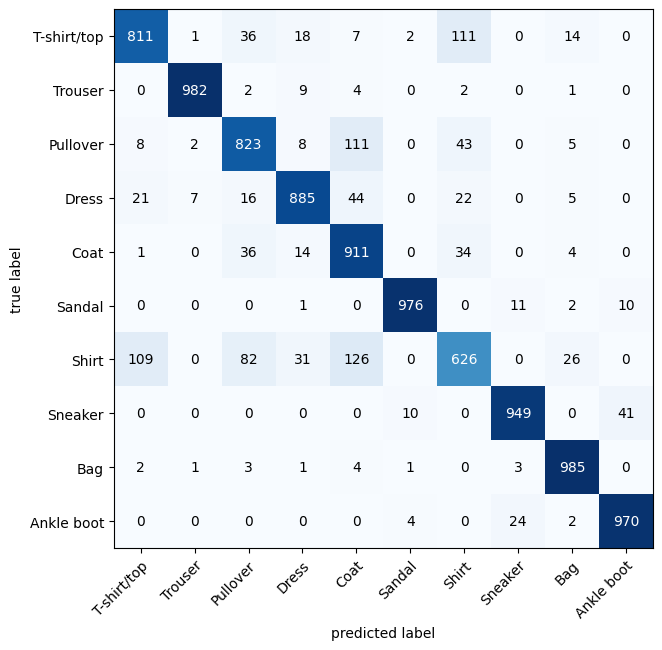

In [235]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.cpu().numpy(), # matplotlib uses nummpy
    class_names=class_names, figsize=(10, 7)
)

### sklearn

In [236]:
y_pred_tensor = torch.cat(y_preds)  # shape: [N]
y_pred_np = y_pred_tensor.cpu().numpy()  # sklearn needs numpy

y_true_np = test_data.targets.numpy()

y_pred_np.shape, y_true_np.shape

((10000,), (10000,))

In [237]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_np, y_pred_np)

In [240]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_true_np, y_pred_np, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.81      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.82      0.82      0.82      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.75      0.91      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.63      0.68      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.94      0.98      0.96      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# save model

In [244]:
from pathlib import Path 

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# create model save
model_name = "tiny_vgg.pth"
model_save_path = model_path / model_name
model_save_path

PosixPath('models/tiny_vgg.pth')

In [246]:
# save model state dict
torch.save(obj=model2.state_dict(), f=model_save_path)